# Logistic Regression Modeling
#### Intro
Suppose we have a set of pairs $(x_i,y_i)$ where $y_i$ takes on binary values of 0 and 1.  How would we fit a single linear regression model to such a data set?
- Consider the following regression model: 

    $y_i = f_\theta(x_i) + \epsilon_i$ 

where $f_\theta(x_i)$ is given by the linear function: $\theta_0 + \theta_1 x^i$

- Since $y_i$ takes on binary values of 0 and 1, assume $y_i$ ~ $Bernoulli(\pi_i)$.  Hence, $E(y_i) = \pi_i$
- Notice that taking expectation of the regression model above, we get: $E(y_i) = \theta_0 + \theta_1 x^i$.  Hence the above regression model can be rewritten as: 

    $y_i = \pi_i(\theta) + \epsilon_i$

    and...

    $\pi_i(\theta) = \theta_0 + \theta_1 x^i$

### Note:
$\pi_i$ is a function of $\theta$

- Hence, fitting a linear regression on binary valued outcomes amounts to finding the probabilities that $y_i$ takes on a value of 1, i.e $Prob(y_i = 1) = \pi_i$
- No guarantee that the model above constraints probabilites to be between 0 and 1 and no guarantee that probabilities can be negative
- For example, loading the iris dataset where the target has 3 classes (first 100 instances is chosen
 since these represent 0,1 encoding).  There are four features in this dataset.  We will chooose the first one out of simplicity.  

In [1]:
from sklearn.datasets import load_iris
# load iris dataset
df = load_iris()# load iris dataset
print("target names")
df.target_names # three classes
print("feature names")
df.feature_names, # 4 features
# we will choose only setosa and versicolor as they are 0 and 1 coded

target names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

feature names


(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],)

In [2]:
print("target values")
df.target
print("feature values-only first 10 shown")
df.data[:10]

target values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

feature values-only first 10 shown


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

No handles with labels found to put in legend.


<Figure size 432x432 with 0 Axes>

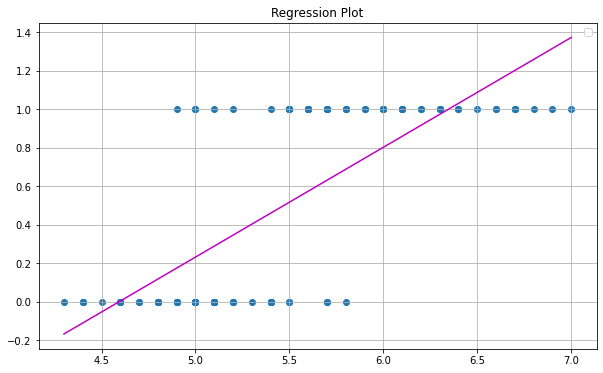

In [4]:
from marketlearn.learning.linear_models import LinearRegression
y = df.target[:100] # choose setosa and veriscolor for 0 and 1 encoding
X = df.data[:100, 0][:, np.newaxis] 
plt.figure(figsize=(6,6));
lr = LinearRegression();
lr.fit(X, y);
lr.reg_plot(X,y)
plt.legend(loc='best');
plt.grid();

#### Note
Notice that we are getting negative values outside the 0 and 1 encoding.  

#### Sigmoid Function
- One way to force the constraints to stay in (0,1) is to transform the hypothesis function: 
    $f_\theta(X) = g(\theta^T X) = \frac{1}{1 + e^{-\theta^T X}}$

    where

    $g(z) = \frac{1}{1 + e^{-z}}$

    is called the sigmoid function or logistic function 
- Now, ols is no longer valid since the parameters are nonlinear.  Hence, one way to solve this is via MLE

In [6]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

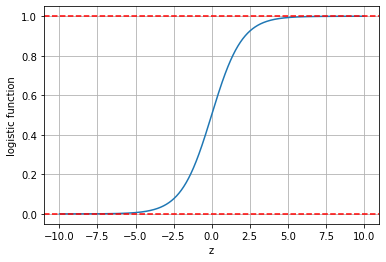

In [7]:
z = np.linspace(-10, 10, 1000)
plt.plot(z, sigmoid(z));
plt.axhline(y=1.0, color='r', linestyle='dashed');
plt.axhline(y=0.0, color='r', linestyle='dashed');
plt.xlabel("z"); plt.ylabel("logistic function");
plt.grid();

### Estimation of parameters
- Two methods will be used: MLE and Gradient Descent

### Maximum Likelihood Estimation
Let 

(1) $\pi_i = (1 + e^{-z})^{-1}$

(2) $1-\pi_i = (1+e^z)^{-1}$

(3) $\frac{\pi_i}{1-\pi_i} = e^z$

Since $yi$ ~ Bernoulli($\pi_i$), We know the density of this function: 
    
(4) $P(Y_i = y_i) = \pi_i^{y_i}(1-\pi_i)^{1-y_i}$, $y_i = 1,0$, $i=1,2,...,n$

and the loglikelihood function: 

(5) $L(\theta | X_1, X_2, ..., X_p) = \prod{f(y_i | \theta)} = \prod{\pi_i^{y_i}(1-\pi_i)^{1-y_i}}$

Taking the logs we see...

$L:= log(L(\theta)) = \sum{y_i log(\pi_i) + (1-y_i)log(1-\pi_i)}$

$ = \sum{y_i log(\frac{\pi_i}{1-\pi_i})} + \sum{log(1-\pi_i)}$

Substituting (1) and (2) in above equations, we see...

(6) $L = \sum{y_i z} - \sum{log(1+e^z)}$

Maximum of loglikelihood function is obtained when $\frac{\partial L}{\partial \theta^T} = 0$.    
note that $\frac{\partial L}{\partial \theta^T} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial \theta^T}$

$\frac{\partial L}{\partial z} = \sum{y_i} - \sum{\frac{e^z}{1+e^z}} = \sum{y_i} - \sum{ \pi_i} = \sum{(y_i - \pi_i)}$

$\frac{\partial z}{\partial \theta^T} = X$ 

since $\frac{\partial z}{\partial \theta^T}$ = $\frac{\partial z}{\partial \theta_0}, \frac{\partial z}{\partial \theta_1}, ..., \frac{\partial z}{\partial \theta_p}$ = $x_1, x_2, ..., x_p$ = $X$

Substituting above, we see...

(7) $\frac{\partial L}{\partial \theta_j^T} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial \theta_j^T} = \sum{(y_i - \pi_i)x_j^i}$ 
    
for the jth feature, where the summation is for all observations, $i=1:n$

where $\frac{\partial L}{\partial \theta^T}$ is a vector of 1xp  and $x_0^i$ is 1

- We are solving for probabilities which are functions of $\theta$ both of which are nonlinear.  Hence an optimization method is needed

### Iterative Reweighted Least Squares
- Note that $\frac{\partial \pi_i}{\partial z} = \frac{e^{z}}{(1 + e^z)^2} = \frac{\pi_i}{1-\pi_i} * (1-\pi_i)^2 = \pi_i (1 - \pi_i)$
- In newton rhapson's method, we iteratively make the guess...

(5) $\theta_{t+1} = \theta_t - H(g(\theta))^{-1} \nabla g(\theta)$

- To calculate the Hessian, note that $\frac{\partial }{\partial \theta}(\frac{\partial L}{\partial \theta^T}) = \frac{\partial }{\partial \theta}\sum{(y_i - \pi_i)x_j^i} = -\sum{( \frac{\partial \pi_i}{\partial \theta})x_j^i}$
- But $\frac{\partial \pi_i}{\partial \theta} = \frac{\partial \pi_i}{\partial z}\frac{\partial z}{\partial \theta} = \pi_i (1-\pi_i)x_j^i$
  
  Hence...

  $HL(\theta) = -\sum{ \pi_i (1-\pi_i)x_j^i x_j^i} = -XWX^T$

  where $W = diag(\pi_i (1-\pi_i)), i:1:n$ and X is a pxn matrix, W is a nxn matrix.  Hence the Hessian is a pxp matrix.  Substituting all this in equation (8), we ...

  (9) $\theta_{t+1} = \theta_t - (XWX^T)^{-1} X(y-\pi)$

Arrange the newton's step in the following way:  $\theta_{t+1} = \theta_t - (XWX^T)^{-1} X(y-\pi)$  

Factoring out the hessian yields...

$\theta_{t+1}= (X^TWX)^{-1}(X^TWX\theta_t - X^T (y - \pi))$

Factoring out $X^T W$ yields...

$\theta_{t+1}= (X^TWX)^{-1}(X^TW)(X\theta_t - W^{-1} (y - \pi))$  Then...

   (10) $\theta_{t+1}= (X^TWX)^{-1}X^TW\bar{z}$ 

where $\bar{z} = X\theta_t - W^{-1} (y - \pi))$ 

In [9]:
# importing two libraries to compare their coefficient on test dataset
from marketlearn.learning.linear_models import LogisticRegression as myLogistic
from sklearn.linear_model import LogisticRegression as sklearnLogistic


In [15]:
import os
path = os.path.dirname(os.path.dirname(os.getcwd()))
path = os.path.join(path, 'datasets', 'smarket_classification', 'smarket.txt')
df = pd.read_csv(path)


In [19]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [20]:
model = sklearnLogistic()
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]

In [21]:
model.fit(X, y=df['Direction'])

LogisticRegression()

In [24]:
print("sklearn's coefficients: ")
model.coef_
print("sklearn's intercept")
model.intercept_[0]

sklearn's coefficients: 


array([[-0.07284345, -0.04223481,  0.0110163 ,  0.00928427,  0.01026372,
         0.13211221]])

sklearn's intercept


-0.12108463339290591

In [25]:
lrm = myLogistic(fit_intercept=True)
y = np.where(df['Direction']=='Up', 1, 0)

In [26]:
lrm.fit(X, y, fit_type='IRLS', niter=20)

Finished 'fit' in 0.1837 secs


In [29]:
print(f"my version's coefficients: {lrm.theta[1:]}")
print(f"my version's intercept: {lrm.theta[0]}")

my version's coefficients: [-0.07307375 -0.04230134  0.01108511  0.00935894  0.01031307  0.13544066]
my version's intercept: -0.12600025890602992
